<a href="https://colab.research.google.com/github/s24966904/note/blob/main/%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92/%E5%9C%96%E5%83%8F%E8%BE%A8%E8%AD%98/simplecnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets.cifar10 import load_data
(x_train,y_train),(x_test,y_test)=load_data()

In [2]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [3]:
trans =["飛機","汽車","鳥","貓","鹿","狗","青蛙","馬","船","卡車"]

青蛙


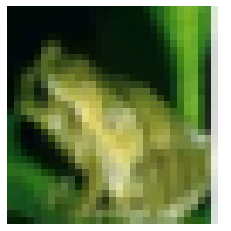

In [4]:
import random
import matplotlib.pyplot as plt
c = random.randint(0,49999)
plt.axis("off")
category=y_train[c][0]
print(trans[category])
plt.imshow(x_train[c])

In [5]:
#卷積不需要攤開
#紅綠藍 px 0~255轉成0~1
x_train_shape = x_train /255
x_test_shape = x_test /255
x_train_shape[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [6]:
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print("原來:",y_train[1])
print("後來:",y_train_cat[1])

原來: [9]
後來: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [7]:
from keras.models import Sequential
#MLP
from keras.layers import Dense,Flatten
#Con
from keras.layers import Conv2D,MaxPooling2D
cnn =Sequential()
cnn.add(Conv2D(32,(3,3),input_shape=(32,32,3),padding="same",activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(64,(3,3),input_shape=(32,32,3),padding="same",activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(128,(3,3),input_shape=(32,32,3),padding="same",activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())
cnn.add(Dense(256,activation="relu"))
cnn.add(Dense(10,activation="softmax"))
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [8]:
cnn.compile(loss="categorical_crossentropy",
      metrics=["accuracy"],
      optimizer="adam")


In [9]:
cnn.fit(x_train_shape,
    y_train_cat,
    batch_size=200,
    epochs=5,
    validation_split=0.1)

Epoch 1/5
225/225 [==============================] - 7s 21ms/step - loss: 1.8644 - accuracy: 0.3123 - val_loss: 1.3322 - val_accuracy: 0.5272
Epoch 2/5
225/225 [==============================] - 4s 18ms/step - loss: 1.2632 - accuracy: 0.5493 - val_loss: 1.1262 - val_accuracy: 0.6046
Epoch 3/5
225/225 [==============================] - 4s 18ms/step - loss: 1.0603 - accuracy: 0.6254 - val_loss: 0.9862 - val_accuracy: 0.6532
Epoch 4/5
225/225 [==============================] - 4s 18ms/step - loss: 0.9182 - accuracy: 0.6800 - val_loss: 0.9239 - val_accuracy: 0.6844
Epoch 5/5
225/225 [==============================] - 4s 18ms/step - loss: 0.8182 - accuracy: 0.7146 - val_loss: 0.8282 - val_accuracy: 0.7144


In [10]:
cnn.evaluate(x_test_shape,y_test_cat)

313/313 [==============================] - 2s 5ms/step - loss: 0.8616 - accuracy: 0.7008


[0.8616254925727844, 0.7008000016212463]

In [11]:
import pandas as pd
pre = cnn.predict_classes(x_test_shape)
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,pre))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,0,1,2,3,4,5,6,7,8,9
0,766,11,61,16,17,7,13,5,72,32
1,25,729,9,21,4,6,13,0,49,144
2,63,3,609,84,78,59,60,26,10,8
3,23,3,79,563,55,158,63,23,23,10
4,20,4,134,74,592,41,63,58,11,3
5,15,2,67,203,45,597,26,29,12,4
6,4,2,63,69,23,21,806,2,5,5
7,17,1,44,55,82,65,10,709,5,12
8,52,28,23,12,10,6,8,1,845,15
9,41,50,17,19,9,9,11,12,40,792


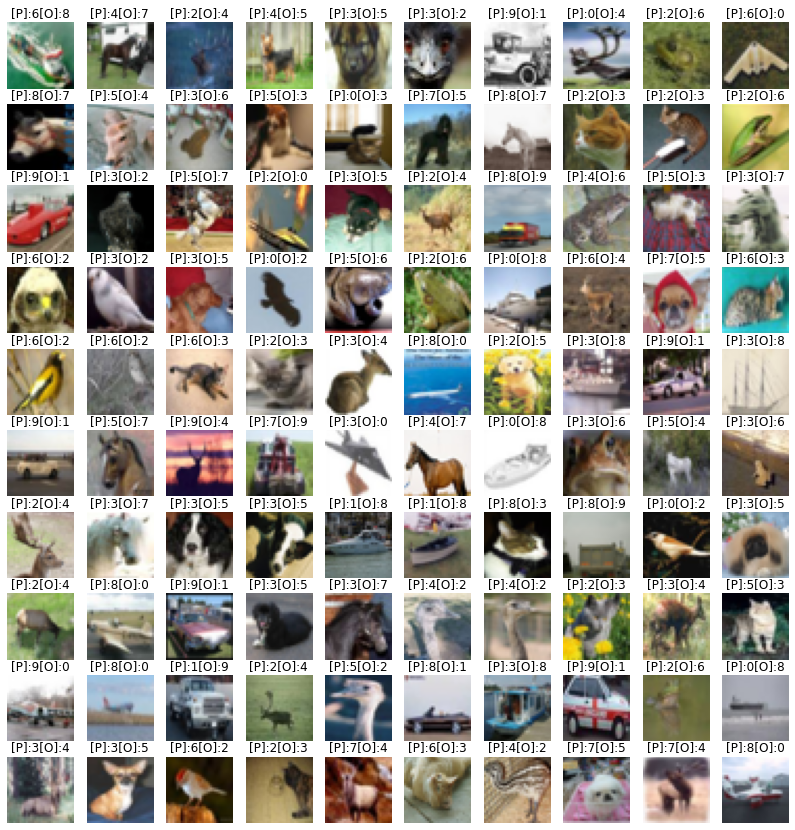

In [13]:
import numpy as np
#list :list [一個數字]
#numpy array:nparray[[多個數字]]
y_dim =y_test.reshape(10000)
diff = np.nonzero(pre != y_dim)[0]
#預測錯誤的圖原本的標籤
orifalse = y_dim[diff]
#預測錯誤的圖的預測標籤
prefalse = pre[diff]
#把圖拿出來
imgfalse = x_test[diff]
#整張圖的寬高
plt.figure(figsize=(14,450))
#我們每一列10個
width=10
height= int(len(imgfalse)/10)+1
for (i,img) in enumerate(imgfalse[0:100]):
  #列數 行數 第幾張圖開始(i開始)
  plt.subplot(height,width,i+1)
  plt.axis("off")
  t="[P]:"+str(prefalse[i]) +  "[O]:" + str(orifalse[i])
  plt.title(t)
  plt.imshow(img)

